# EDA on All Labels 

In [1]:
dataset={"csv_path":"../datasets/heat_map_train.csv","description":"Heat Map Train Full Data Set","balanced_csv_save_path":"../datasets/heat_map_train_final.csv"}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
def plot_histogram(df,dataset_description):
    zeros=[]
    nulls=[]
    ones=[]
    negative=[]

    for column in df.columns:
        zeros.append((df[column]==0).sum())
        nulls.append( df[column].isnull().sum())
        ones.append((df[column]==1).sum())
        negative.append((df[column]==-1).sum())


    # make a histogram of the number of ones and zeros in each column
    fig, ax = plt.subplots(figsize=(12, 8))
    index = np.arange(len(df.columns))
    bar_width = 0.15
    opacity = 0.8
    plt.bar(index, ones, bar_width, alpha=opacity, color='b', label='ones')
    plt.bar(index + bar_width, zeros, bar_width, alpha=opacity, color='r', label='zeros')
    plt.bar(index + 2*bar_width, nulls, bar_width, alpha=opacity, color='g', label='nulls')
    plt.bar(index + 3*bar_width, negative, bar_width, alpha=opacity, color='y', label='negative')

    plt.xlabel('Columns')
    plt.ylabel('Frequency')
    plt.title('Frequency of Labels per class (' + dataset_description+')')
    plt.xticks(index + bar_width, df.columns, rotation='vertical')
    plt.legend()
    plt.show()

In [4]:
# Read CSV File
df = pd.read_csv(dataset["csv_path"])

# remove the first two columns
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

# remove the last column
df = df.drop(df.columns[-1], axis=1)
df = df.drop(df.columns[-1], axis=1)
# try:
#     df=df.drop(columns=["Consolidation","Enlarged Cardiomediastinum","Fracture","Lung Lesion","Pleural Other","Pneumothorax"])
# except:
#     print("🔴🔴Columns already removed")
    
# Print column names with index
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

df.head()



Column 0: Atelectasis
Column 1: Cardiomegaly
Column 2: Consolidation
Column 3: Edema
Column 4: Enlarged Cardiomediastinum
Column 5: Fracture
Column 6: Lung Lesion
Column 7: Lung Opacity
Column 8: No Finding
Column 9: Pleural Effusion
Column 10: Pleural Other
Column 11: Pneumonia
Column 12: Pneumothorax
Column 13: Support Devices


,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN
3,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


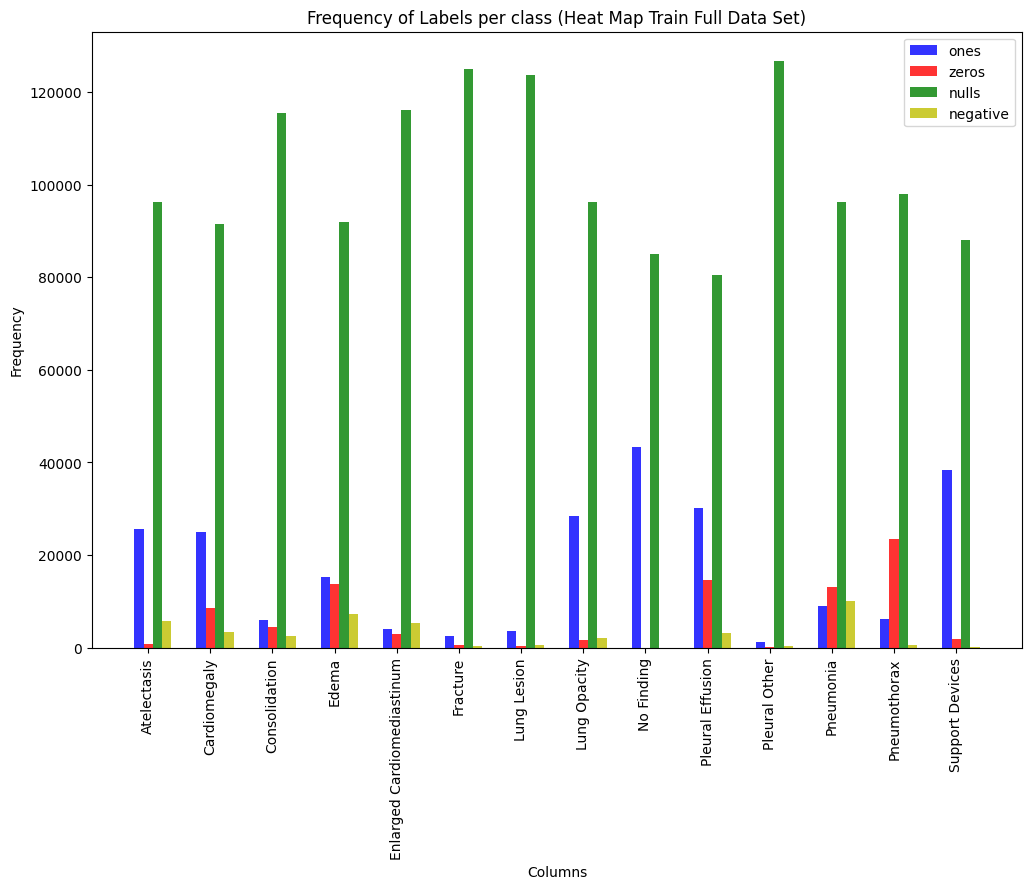

In [5]:
plot_histogram(df=df,dataset_description=dataset['description'])


### Uones approach

In [5]:
def convert_neg_to_ones(df):
    for column in df.columns:
        # check if the column name is not 'class'
        # if column == 'No Finding':
        #     continue
        # replace -1 with 1
        df[column] = df[column].replace(-1.0, 1.0)
      
    return df

Column 0: Atelectasis
Column 1: Cardiomegaly
Column 2: Consolidation
Column 3: Edema
Column 4: Enlarged Cardiomediastinum
Column 5: Fracture
Column 6: Lung Lesion
Column 7: Lung Opacity
Column 8: No Finding
Column 9: Pleural Effusion
Column 10: Pleural Other
Column 11: Pneumonia
Column 12: Pneumothorax
Column 13: Support Devices


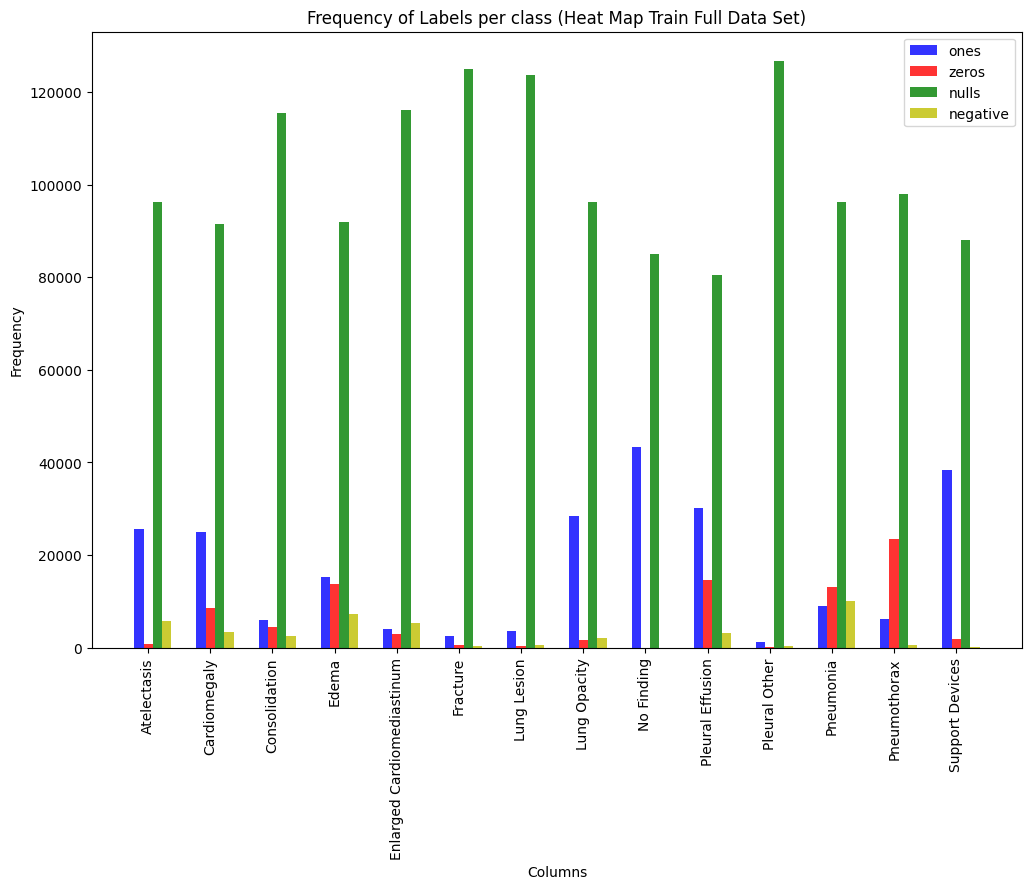

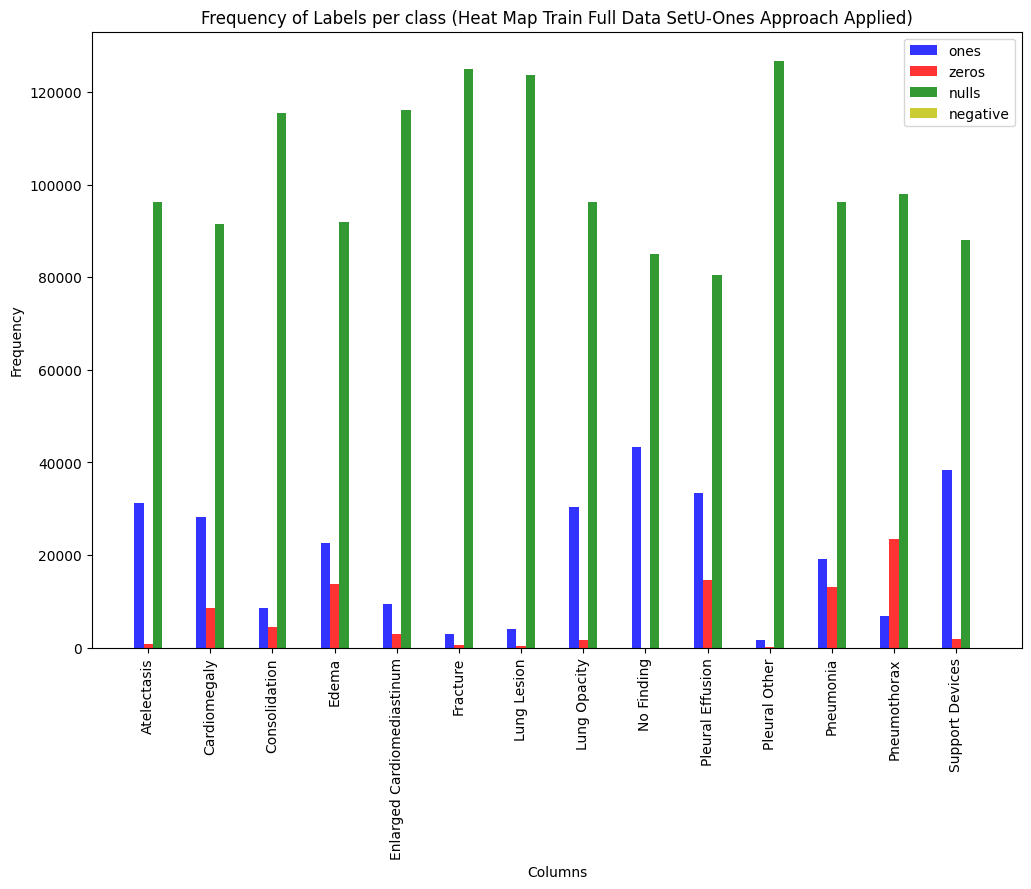

In [7]:
# Read CSV File
df = pd.read_csv(dataset["csv_path"])

# remove the first two columns
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

# remove the last column
df = df.drop(df.columns[-1], axis=1)
df = df.drop(df.columns[-1], axis=1)
# try:
#     df=df.drop(columns=["Consolidation","Enlarged Cardiomediastinum","Fracture","Lung Lesion","Pleural Other","Pneumothorax"])
# except:
#     print("🔴🔴Columns already removed")
    
# Print column names with index
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

df.head()


plot_histogram(df,dataset["description"])

df = convert_neg_to_ones(df)

plot_histogram(df,dataset["description"] + "U-Ones Approach Applied")

# # append df to new_df
# new_df = pd.concat([new_df, df], axis=1)

# save new_df to csv
# new_df.to_csv("heat_map_train_final.csv", index=False)


### -1--> 1 nan --> 0|

In [11]:
def convert_neg_to_ones_nan_zeros(df):
    for column in df.columns:
        # check if the column name is not 'class'
        # if column == 'No Finding':
        #     continue
        # replace -1 with 1
        df[column] = df[column].replace(-1.0, 1.0)

        df[column] = df[column].replace(np.nan, 0.0)
      
    return df

Column 0: Atelectasis
Column 1: Cardiomegaly
Column 2: Consolidation
Column 3: Edema
Column 4: Enlarged Cardiomediastinum
Column 5: Fracture
Column 6: Lung Lesion
Column 7: Lung Opacity
Column 8: No Finding
Column 9: Pleural Effusion
Column 10: Pleural Other
Column 11: Pneumonia
Column 12: Pneumothorax
Column 13: Support Devices


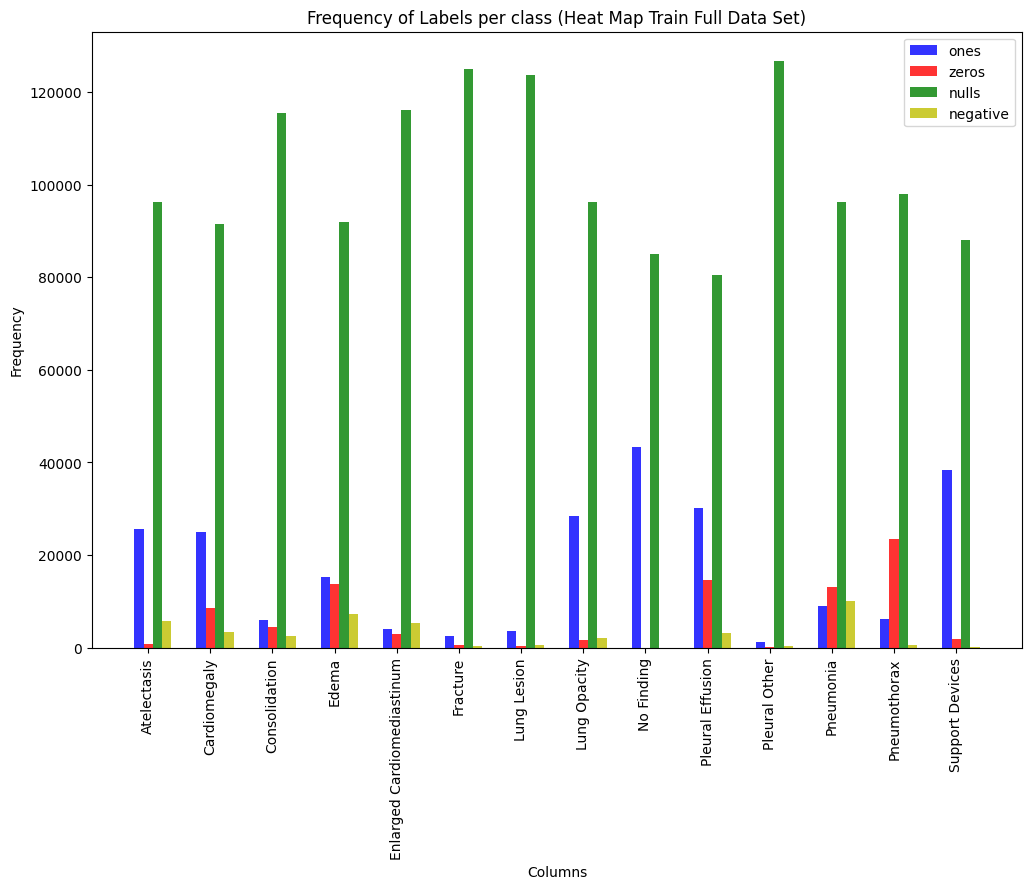

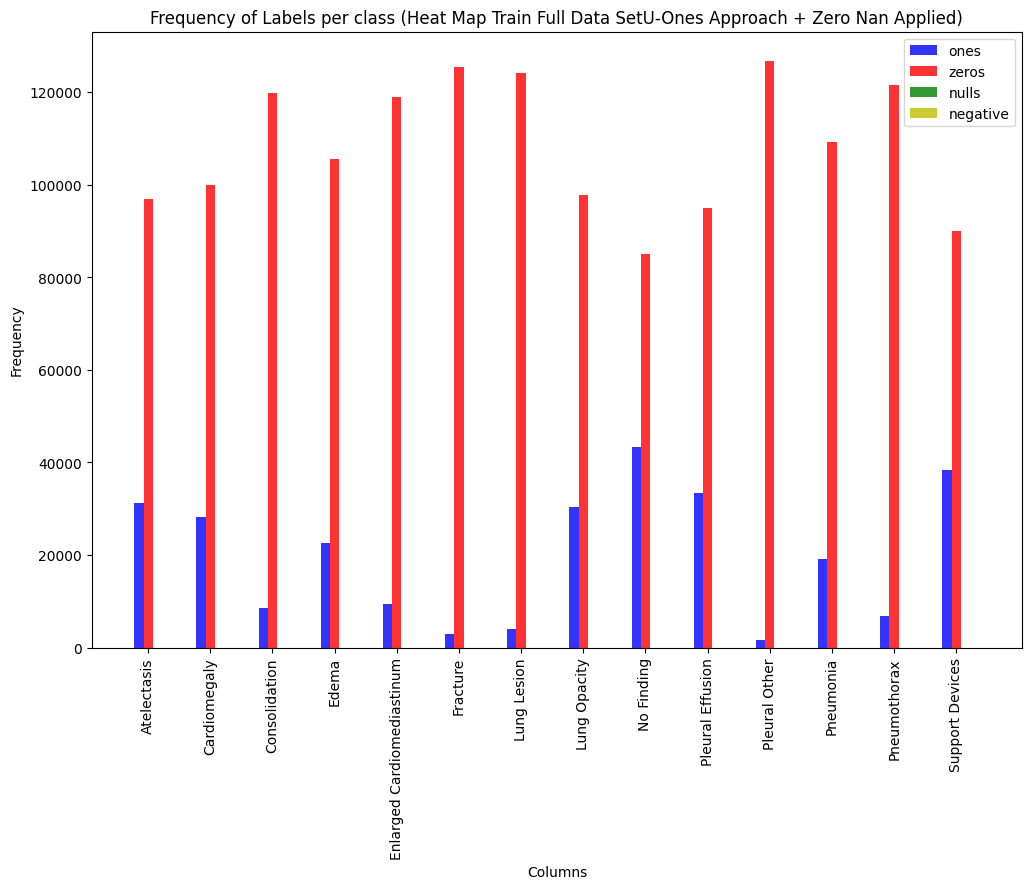

In [12]:
# Read CSV File
df = pd.read_csv(dataset["csv_path"])

# remove the first two columns
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

# remove the last column
df = df.drop(df.columns[-1], axis=1)
df = df.drop(df.columns[-1], axis=1)
# try:
#     df=df.drop(columns=["Consolidation","Enlarged Cardiomediastinum","Fracture","Lung Lesion","Pleural Other","Pneumothorax"])
# except:
#     print("🔴🔴Columns already removed")
    
# Print column names with index
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

df.head()


plot_histogram(df,dataset["description"])

df = convert_neg_to_ones_nan_zeros(df)

plot_histogram(df,dataset["description"] + "U-Ones Approach + Zero Nan Applied")

# # append df to new_df
# new_df = pd.concat([new_df, df], axis=1)

# save new_df to csv
# new_df.to_csv("heat_map_train_final.csv", index=False)
